In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 23.1MB/s]
100% 149M/149M [00:07<00:00, 20.2MB/s]


In [3]:
'''
    Function: get_class_paths
    Objective: Load the metadata of a dataset onto a pandas Dataframe,
               and return it.
    Params: file_path (str)
    Returns: df (pd.Dataframe) (containing all the classes with
             respective paths)

'''
def get_class_paths(file_path):
    classes = []
    class_paths = []

    # Iterate through directories in training path
    for label in os.listdir(file_path):
        label_path = os.path.join(file_path, label)
        print(label_path)

        # Check the directory path validity.
        if os.path.isdir(label_path):
            # Iterate through the images in the directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add the class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a Dataframe with collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df



In [4]:
# Create the training and testing dataframes.

# Adjust train and test path based on your specifications.
train_path = '/content/Training'
test_path = '/content/Testing'
train_df = get_class_paths(train_path)
test_df = get_class_paths(test_path)


/content/Training/meningioma
/content/Training/glioma
/content/Training/notumor
/content/Training/pituitary
/content/Testing/meningioma
/content/Testing/glioma
/content/Testing/notumor
/content/Testing/pituitary


In [5]:
train_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_1245.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0590.jpg,meningioma
2,/content/Training/meningioma/Tr-me_0153.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0130.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0024.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1392.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1049.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0248.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0790.jpg,pituitary


In [6]:
test_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0208.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0151.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0046.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0112.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0034.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0140.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0011.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0269.jpg,pituitary
1309,/content/Testing/pituitary/Te-piTr_0007.jpg,pituitary


Text(0.5, 1.0, 'Number of image data points by class (Train)')

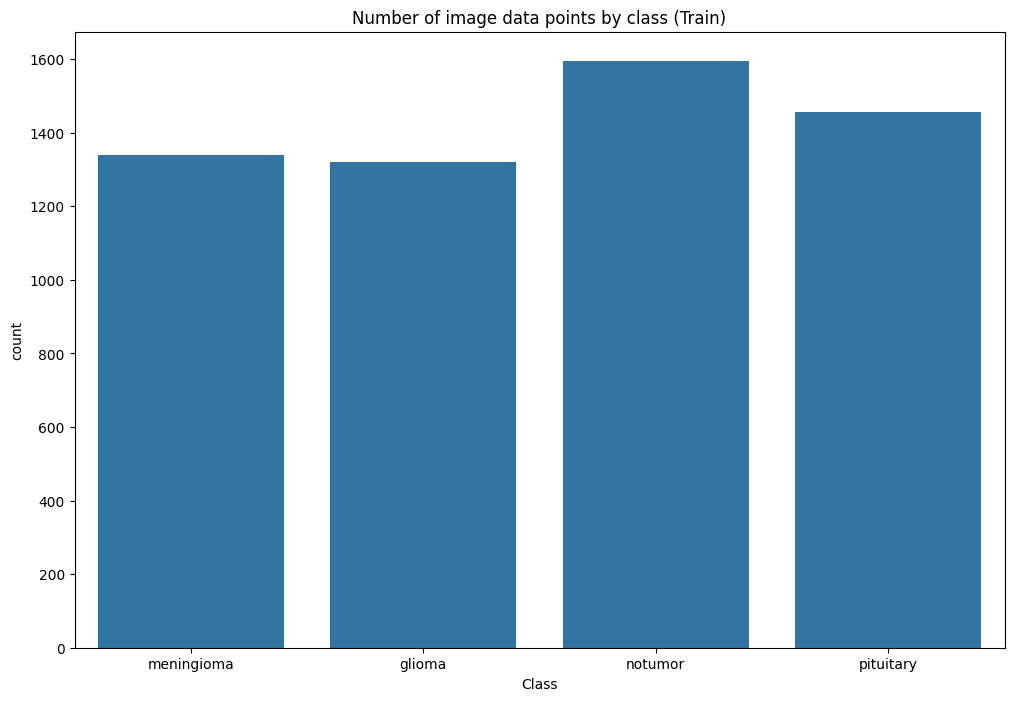

In [7]:
#  Visualizing our training data
plt.figure(figsize=(12,8))
ax = sns.countplot(data=train_df, x=train_df['Class'])
plt.title('Number of image data points by class (Train)')

Text(0.5, 1.0, 'Number of image data points by class (Test)')

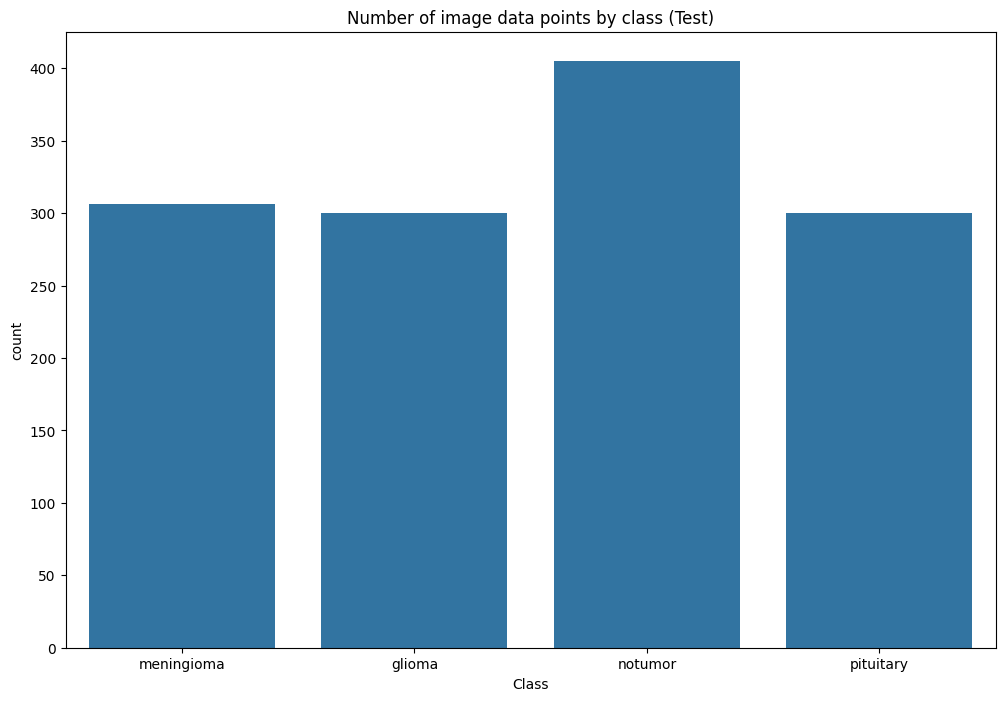

In [8]:
#  Visualizing our training data
plt.figure(figsize=(12,8))
ax = sns.countplot(data=test_df, x=test_df['Class'])
plt.title('Number of image data points by class (Test)')

In [9]:
# Import necessary libraries to run experiment
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Dropout, Flatten
# from tensorflow.python.keras.optimizer_v1 import Adamax
# from tensorflow.python.keras.metrics import Precision, Recall


# Building the CNN layer by layer i.e. stacking layers linearly
from tensorflow.keras.models import Sequential
# Layer optimizers to build and train the model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
# For preprocessing and evaluation
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [10]:
#  Split the testing data into validation and testing sets
# to avoid overfitting issues in the future.

validation_df, testing_df = train_test_split(test_df, train_size=0.5, stratify=test_df['Class'])
# Params explanation (train_test_split): which data, split proportions, proportion of data based on 'Class' attribute




In [11]:
 validation_df

,Class Path,Class
488,/content/Testing/glioma/Te-gl_0291.jpg,glioma
45,/content/Testing/meningioma/Te-me_0127.jpg,meningioma
146,/content/Testing/meningioma/Te-me_0280.jpg,meningioma
601,/content/Testing/glioma/Te-gl_0192.jpg,glioma
1152,/content/Testing/pituitary/Te-pi_0057.jpg,pituitary
...,...,...
853,/content/Testing/notumor/Te-no_0385.jpg,notumor
271,/content/Testing/meningioma/Te-me_0209.jpg,meningioma
522,/content/Testing/glioma/Te-gl_0115.jpg,glioma
449,/content/Testing/glioma/Te-gl_0153.jpg,glioma


In [12]:
testing_df

,Class Path,Class
421,/content/Testing/glioma/Te-gl_0229.jpg,glioma
579,/content/Testing/glioma/Te-gl_0122.jpg,glioma
756,/content/Testing/notumor/Te-no_0062.jpg,notumor
268,/content/Testing/meningioma/Te-me_0140.jpg,meningioma
831,/content/Testing/notumor/Te-no_0032.jpg,notumor
...,...,...
1276,/content/Testing/pituitary/Te-pi_0199.jpg,pituitary
1070,/content/Testing/pituitary/Te-pi_0105.jpg,pituitary
51,/content/Testing/meningioma/Te-me_0237.jpg,meningioma
93,/content/Testing/meningioma/Te-me_0141.jpg,meningioma


In [13]:
# Before training our model, first step is to
# preprocess our data.

'''
    Preprocessing actions:
    1. Setting a batch size.
    2. Resizing all the images to same dimenesions.
    3. Rescale image pixel values from range[0,255] to range[0,1].
    4. Consistent brightness range from [0.8,1.2] .
    Reasons:
    1. All the images are of different sizes, so resizing them
      to the same dimensions, could help the model train more
      consistently. Prevents throwing it off on factors that don't
      affect performance (Correct classification).
    2. Rescaling pixel values and brightness makes the model more
      robust and helps it generalize better on input data.
    3. Note: For testing data, don't adjust brightness so that model
      generalizes better on unseen data.
'''

# Experiment with these values
batch_size = 32
test_batch_size = int(batch_size / 2)  #convert to int -> avoid errors in evaluation
image_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

testing_generator = ImageDataGenerator(rescale=1/255)

In [14]:
'''Use the generators and size definitions to create three dataflows for:
training, validation and testing.
These flows will take image data from given dataframe and prepare them
as input to the deep learning model.'''

train_gen = image_generator.flow_from_dataframe(
    train_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

Found 5712 validated image filenames belonging to 4 classes.


In [15]:
# Do the same for validation and testing splits.
validation_gen = image_generator.flow_from_dataframe(
    validation_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

testing_gen = testing_generator.flow_from_dataframe(
    testing_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=test_batch_size,
    target_size=image_size,
    shuffle=False       # maintain the order for consistent testing.
)


Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


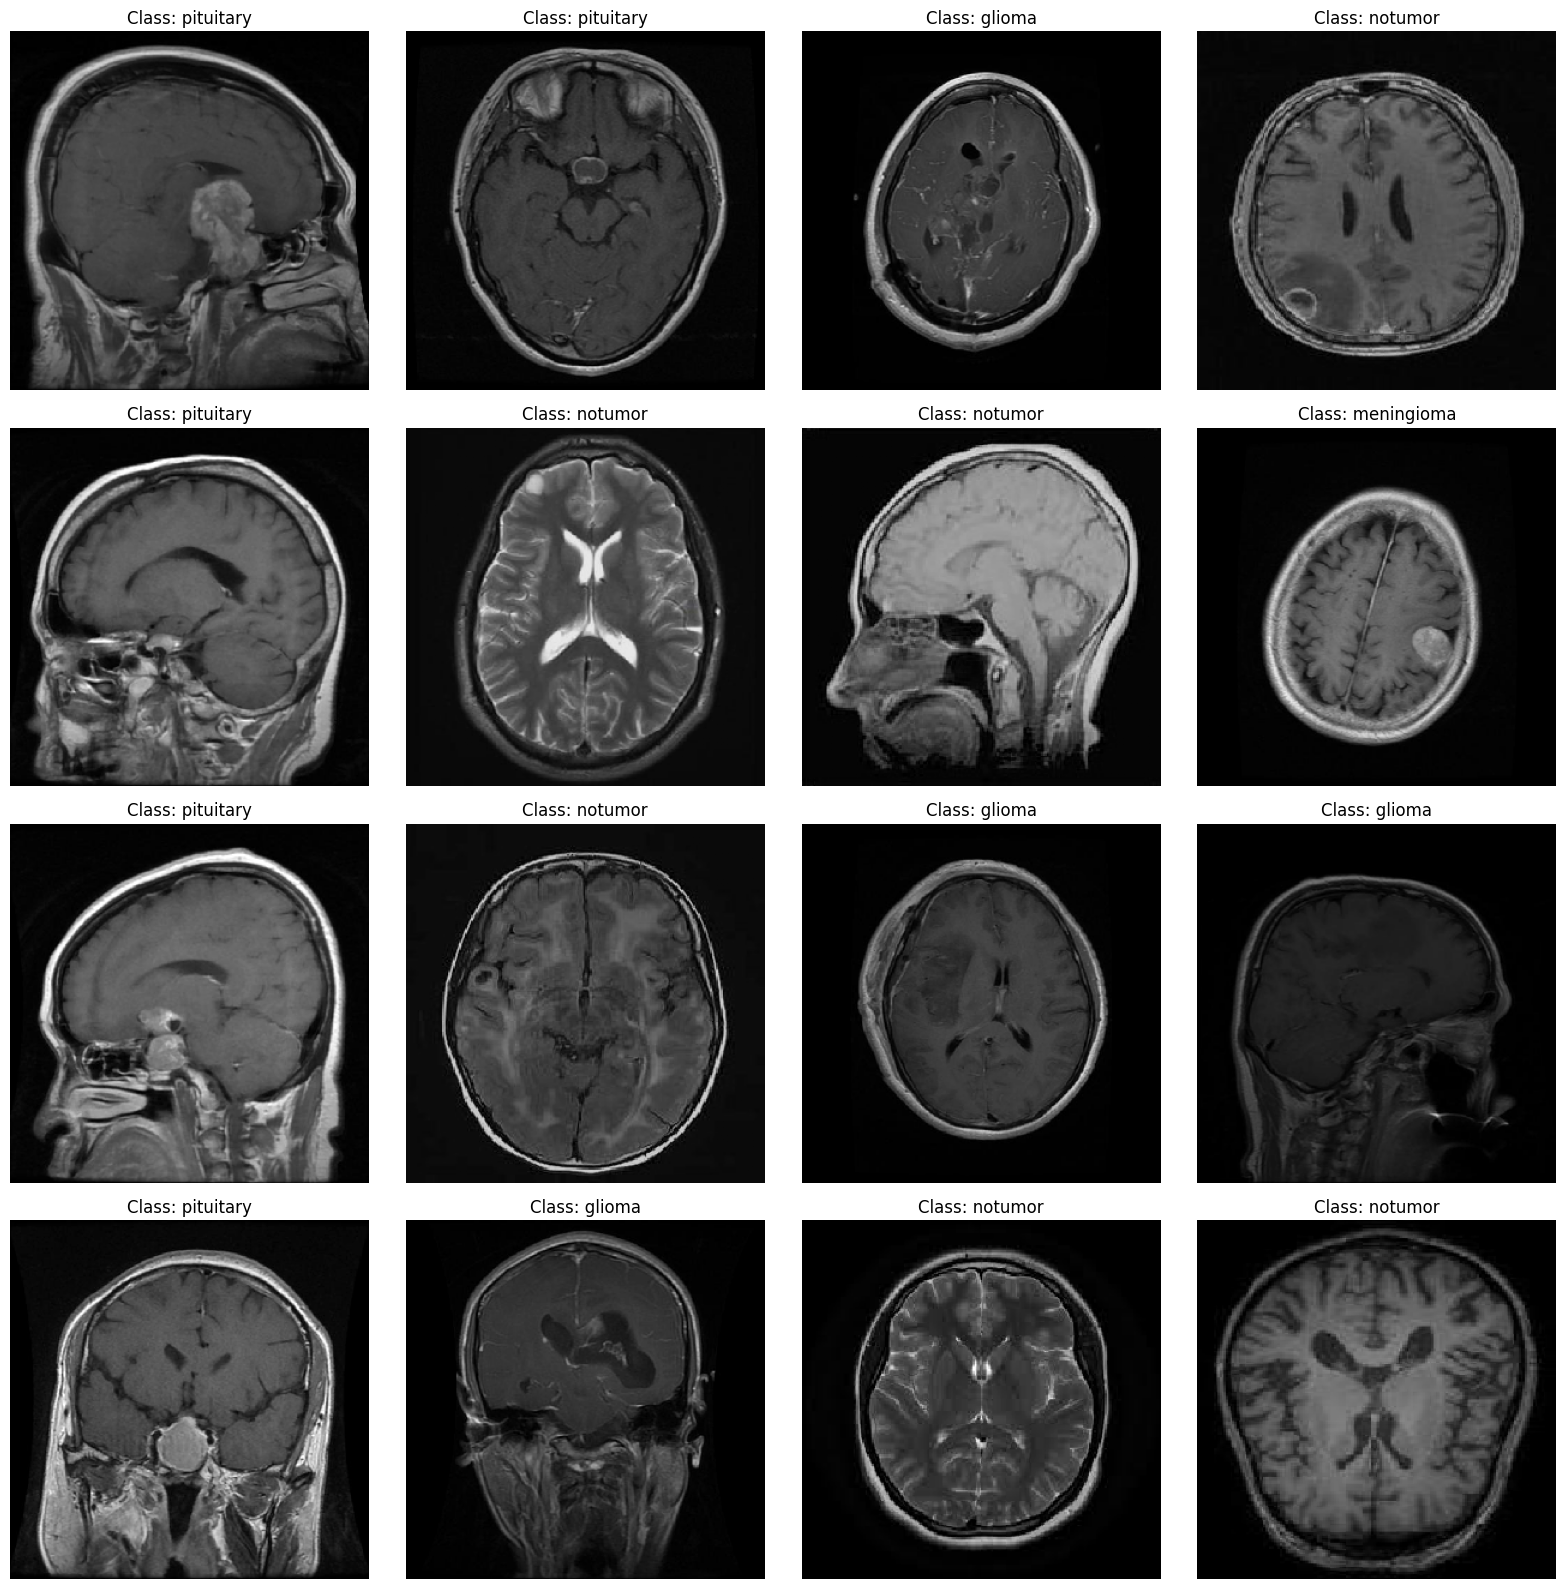

In [16]:
# Viewing preprocessed images

plt.figure(figsize=(16,16))
for idx in range(16):
    # Creating individual subplots
    plt.subplot(4, 4, idx + 1)
    batch = next(train_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Retrieve class index
    class_index = np.argmax(label)

    # Retrieve list of class names and class indices
    class_names = list(train_gen.class_indices.keys())
    class_indices = list(train_gen.class_indices.values())

    # Retrieve index of class_index from class_indices list
    class_index_position = class_indices.index(class_index)

    # find the class name from the class index position
    class_name = class_names[class_index_position]

    # Lastly, set title and turn off axes display
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
image_shape = (299,299,3)
# 299 x 299 -> image size and 3 -> #channels(RGB)

# Loading Xception model with weights used for training on ImageNet dataset.
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=image_shape,
    pooling='max'
)

adapted_model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [18]:
adapted_model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       Precision(),
                       Recall()])

In [19]:
hist = adapted_model.fit(
    train_gen,
    epochs=4,
    validation_data=validation_gen
)


Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.6515 - loss: 0.8997 - precision: 0.8152 - recall: 0.4972 - val_accuracy: 0.8519 - val_loss: 0.4630 - val_precision: 0.8530 - val_recall: 0.8504
Epoch 2/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 776ms/step - accuracy: 0.9730 - loss: 0.0862 - precision: 0.9758 - recall: 0.9707 - val_accuracy: 0.9252 - val_loss: 0.2194 - val_precision: 0.9276 - val_recall: 0.9191
Epoch 3/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 772ms/step - accuracy: 0.9899 - loss: 0.0342 - precision: 0.9900 - recall: 0.9897 - val_accuracy: 0.9756 - val_loss: 0.0663 - val_precision: 0.9756 - val_recall: 0.9756
Epoch 4/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 772ms/step - accuracy: 0.9896 - loss: 0.0345 - precision: 0.9896 - recall: 0.9896 - val_accuracy: 0.9878 - val_loss: 0.0284 - val_precision: 0.9878 - val_recall: 0.9878


In [20]:
# Display model summary for documentation
adapted_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,263,750 (241.33 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 42,139,482 (160.75 MB)

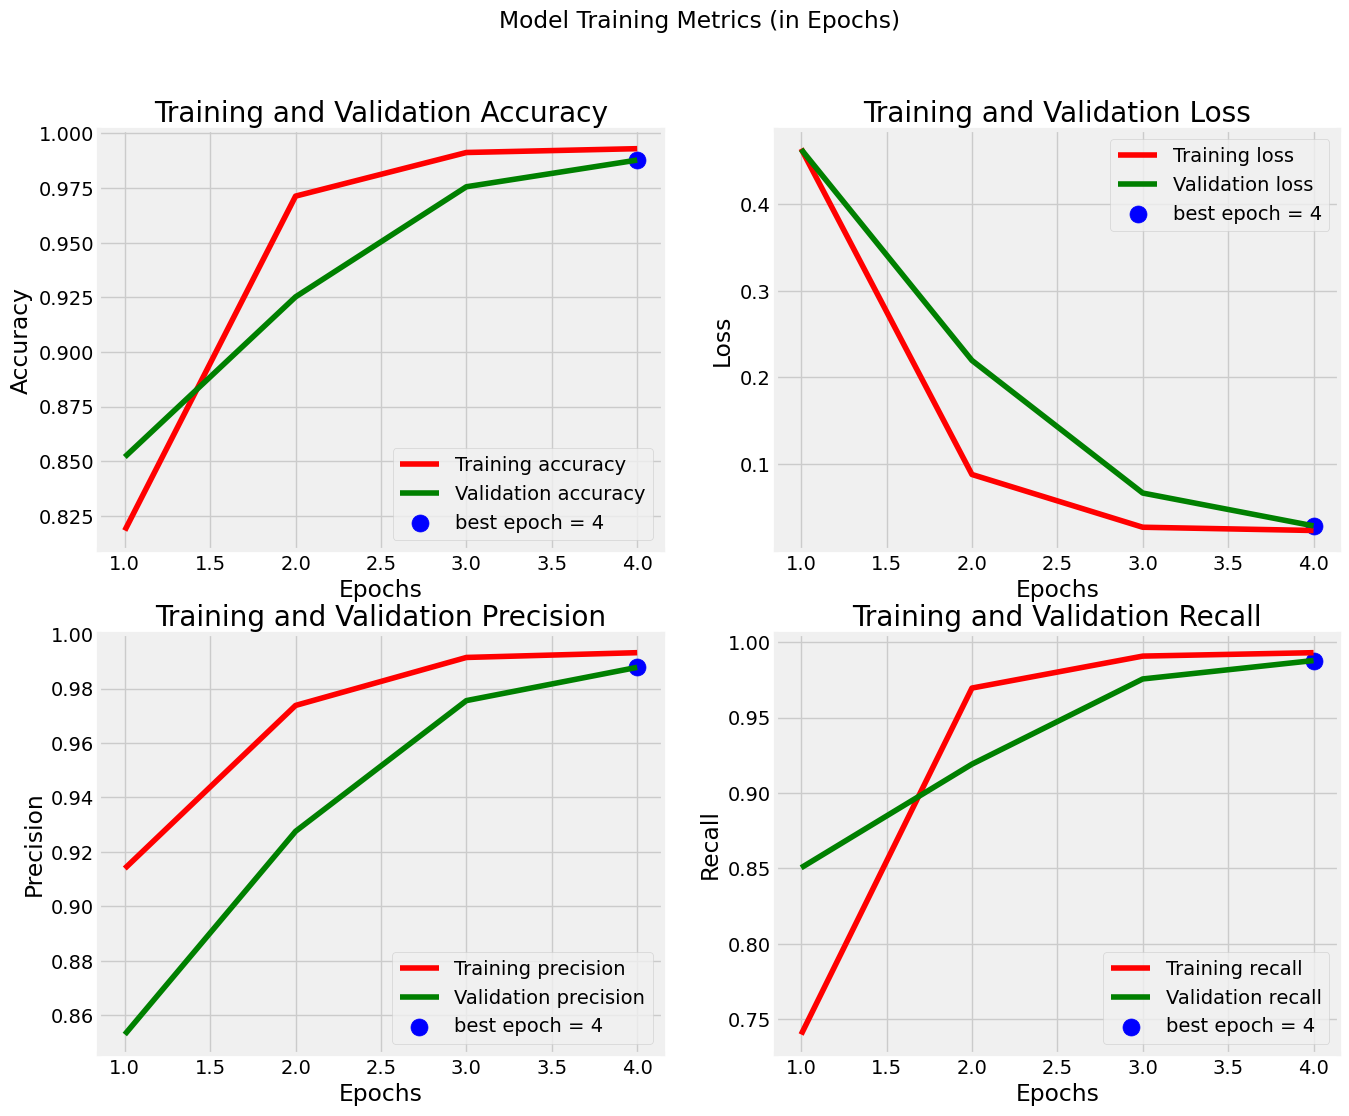

In [21]:
# Getting the training and validation history
metrics = ['accuracy', 'loss', 'precision', 'recall']
train_metrics = {m: hist.history[m] for m in metrics}
validation_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Finding the best epochs and values achieved
best_epochs = {}
best_values = {}

for metric in metrics:
    if metric == 'loss':
        # find the lowest validation loss and store it's index
        idx = np.argmin(validation_metrics[metric])
    else:
        idx = np.argmax(validation_metrics[metric])

    best_epochs[metric] = idx + 1
    best_values[metric] = validation_metrics[metric][idx]


# Plot results
plt.figure(figsize=(16,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(train_metrics[metric]) + 1)

    plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric],
                s=150, c='blue', label=f'best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics (in Epochs)')
plt.show()


In [22]:
# Evaluate model performance on dataset splits - train, test and validation

train_score = adapted_model.evaluate(train_gen, verbose=1)
validation_score = adapted_model.evaluate(validation_gen, verbose=1)
test_score = adapted_model.evaluate(testing_gen, verbose=1)

print(f"Training Accuracy: {train_score[1] * 100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")

print(f"\n\nValidation Accuracy: {validation_score[1] * 100:.2f}%")
print(f"Validation Loss: {validation_score[0]:.4f}")

print(f"\n\nTesting Accuracy: {test_score[1] * 100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9988 - loss: 0.0034 - precision: 0.9988 - recall: 0.9988
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.9917 - loss: 0.0336 - precision: 0.9917 - recall: 0.9917
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9375 - loss: 0.0542 - precision: 0.9375 - recall: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9842 - loss: 0.0287 - precision: 0.9842 - recall: 0.9842
Training Accuracy: 99.88%
Training Loss: 0.0035


Validation Accuracy: 98.93%
Validation Loss: 0.0320


Testing Accuracy: 98.78%
Testing Loss: 0.0363


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step


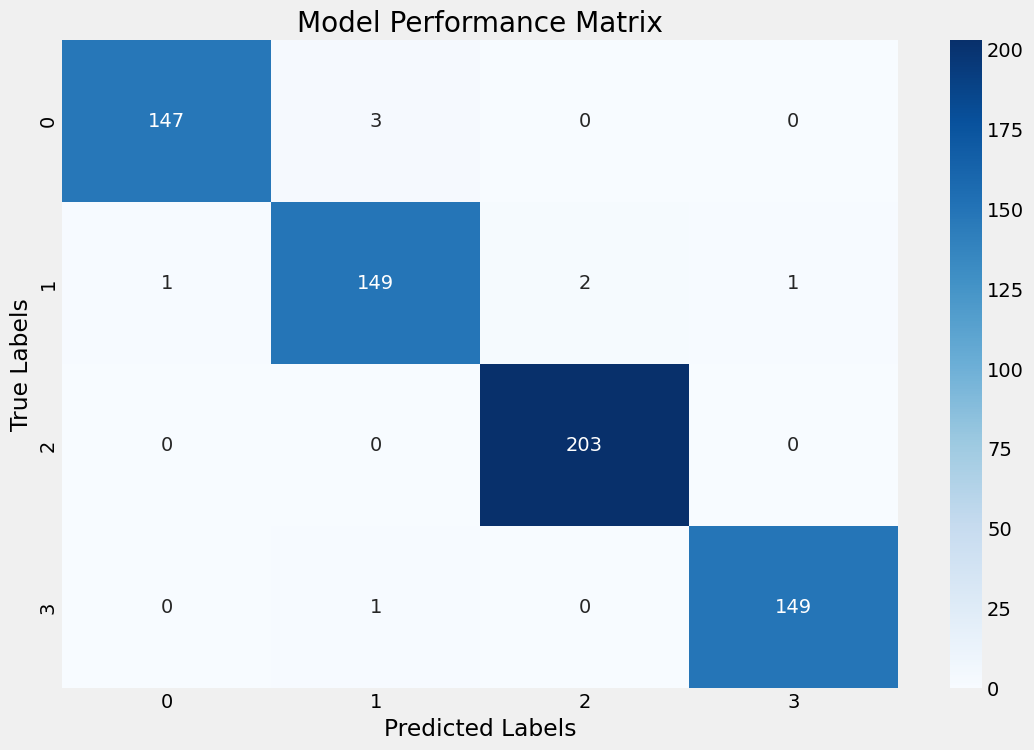

In [23]:
# Create a confusion matrix to investigate the scenarios where the model
# performs best and scenarios where the model could be improved.

preds = adapted_model.predict(testing_gen)
# choose the highest probability class
y_pred = np.argmax(preds, axis=1)

# Map the classes to numerical categories, as the model understands numerical
# class labels.

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Create and display the confusion matrix.

conf_matrix = confusion_matrix(testing_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Model Performance Matrix')
plt.show()


In [24]:
# Define a function to visualize model predictions on new images.

from PIL import Image

def predict(image_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6,8))

    # Load and preprocess input image

    image = Image.open(image_path)
    resized_image = image.resize((299,299))

    image_array = np.asarray(resized_image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0

    # Retrieve model predictions
    predictions = adapted_model.predict(image_array)
    probabilities = list(predictions[0])

    # Retrieve predicted classes
    predicted_class_index = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_index]

    # Plot input image
    plt.subplot(2,1,1)
    plt.imshow(resized_image)
    plt.title(f'Input MRI image \nPredicted class: {predicted_class}')

    # Plot prediction proabilities achieved
    plt.subplot(2,1,2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probabilites", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"Predicted tumor type: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


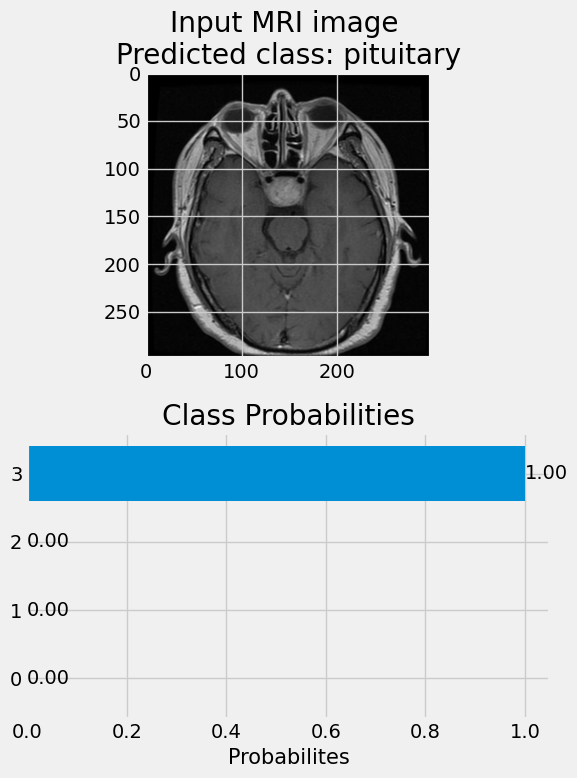

Predicted tumor type: pituitary


In [25]:
# Write test cases.

predict("/content/Testing/pituitary/Te-pi_0042.jpg")

In [26]:
# Save model weights for future utilization.
adapted_model.save_weights('xception_model.weights.h5')

Building a custom CNN Model.

Objectives-
1. Lightweight (Lower # training parameters)
2. Target Accuracy - atleast 90% would be a good start
3. Train on same MRI dataset as Xception Model.
4. Evaluate performance similar to what was done before.


In [27]:
# import necessary libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

In [28]:
# Adjust hyper-parameters and image generators (Reinitializing earlier code.)

# Reduce image size to reduce memory usage during model training
batch_size = 16

image_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

testing_generator = ImageDataGenerator(rescale=1/255)

train_gen = image_generator.flow_from_dataframe(
    train_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

validation_gen = image_generator.flow_from_dataframe(
    validation_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=image_size
)

testing_gen = testing_generator.flow_from_dataframe(
    testing_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=test_batch_size,
    target_size=image_size,
    shuffle=False       # maintain the order for consistent testing procedure.
)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [29]:
custom_model = Sequential()
input_shape = (224,224,3)

# Experiment with adding convolutional layers

# custom_model.add(Conv2D(256, (3,3), padding='same', input_shape=(224,224,3), activation='relu'))
# custom_model.add(BatchNormalization())
# custom_model.add(MaxPooling2D(pool_size=(2,2)))

# 1st Convolutional Layer
custom_model.add(Conv2D(512, (3,3), padding='same', input_shape=input_shape, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Dropout(0.25))

# 2nd Convolutional Layer
custom_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Dropout(0.25))

# 3rd Convolutional Layer
custom_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2,2)))
custom_model.add(Dropout(0.25))

# 4th Convolutional Layer
custom_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output for fully connected layers
custom_model.add(Flatten())

# Fully connected layers
custom_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
custom_model.add(Dropout(0.35))

# Add output layer with 4 neurons representative of output classes
custom_model.add(Dense(4, activation='softmax'))

# Compile the model
custom_model.compile(
    Adamax(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', Precision(), Recall()]
)

# Display model summary
custom_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,779,204 (18.23 MB)

 Trainable params: 4,777,412 (18.22 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [31]:
cm_hist = custom_model.fit(
    train_gen,
    epochs=18,
    validation_data=validation_gen
)

Epoch 1/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 392ms/step - accuracy: 0.6271 - loss: 6.5535 - precision_1: 0.6615 - recall_1: 0.5759 - val_accuracy: 0.2382 - val_loss: 5.8256 - val_precision_1: 0.2376 - val_recall_1: 0.2336
Epoch 2/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - accuracy: 0.8066 - loss: 3.0219 - precision_1: 0.8358 - recall_1: 0.7726 - val_accuracy: 0.7740 - val_loss: 2.6274 - val_precision_1: 0.7897 - val_recall_1: 0.7511
Epoch 3/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 122s 340ms/step - accuracy: 0.8552 - loss: 2.1300 - precision_1: 0.8692 - recall_1: 0.8370 - val_accuracy: 0.8366 - val_loss: 1.7141 - val_precision_1: 0.8513 - val_recall_1: 0.8214
Epoch 4/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 119s 333ms/step - accuracy: 0.8855 - loss: 1.5127 - precision_1: 0.8954 - recall_1: 0.8696 - val_accuracy: 0.8351 - val_loss: 1.4367 - val_precision_1: 0.8427 - val_recall_1: 0.8260
Epoch 5/18
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 334ms/step - accuracy: 0.9035 - loss: 1.0648 - precision_1: 0.9111 

In [32]:
print(f"What's inside: \n{cm_hist.history} \n{cm_hist.history.keys()}", )

What's inside: 
{'accuracy': [0.7128851413726807, 0.819327712059021, 0.8588935732841492, 0.8911064267158508, 0.9101890921592712, 0.9259454011917114, 0.9406512379646301, 0.9480041861534119, 0.9581582546234131, 0.9611344337463379, 0.9683123230934143, 0.9753151535987854, 0.9781162738800049, 0.9830182194709778, 0.9819678068161011, 0.9861694574356079, 0.9870448112487793, 0.9859943985939026], 'loss': [4.586449146270752, 2.7790589332580566, 1.9772800207138062, 1.3936614990234375, 0.9885296821594238, 0.7130196690559387, 0.52284175157547, 0.4079493582248688, 0.3259161114692688, 0.28452637791633606, 0.24531307816505432, 0.20929908752441406, 0.19277170300483704, 0.16879865527153015, 0.16404284536838531, 0.14482413232326508, 0.13626407086849213, 0.1314859539270401], 'precision_1': [0.7555689215660095, 0.8426671624183655, 0.8738181591033936, 0.9021230936050415, 0.916281521320343, 0.9328835010528564, 0.9441893100738525, 0.9516669511795044, 0.9604569673538208, 0.9635819792747498, 0.9697980880737305, 

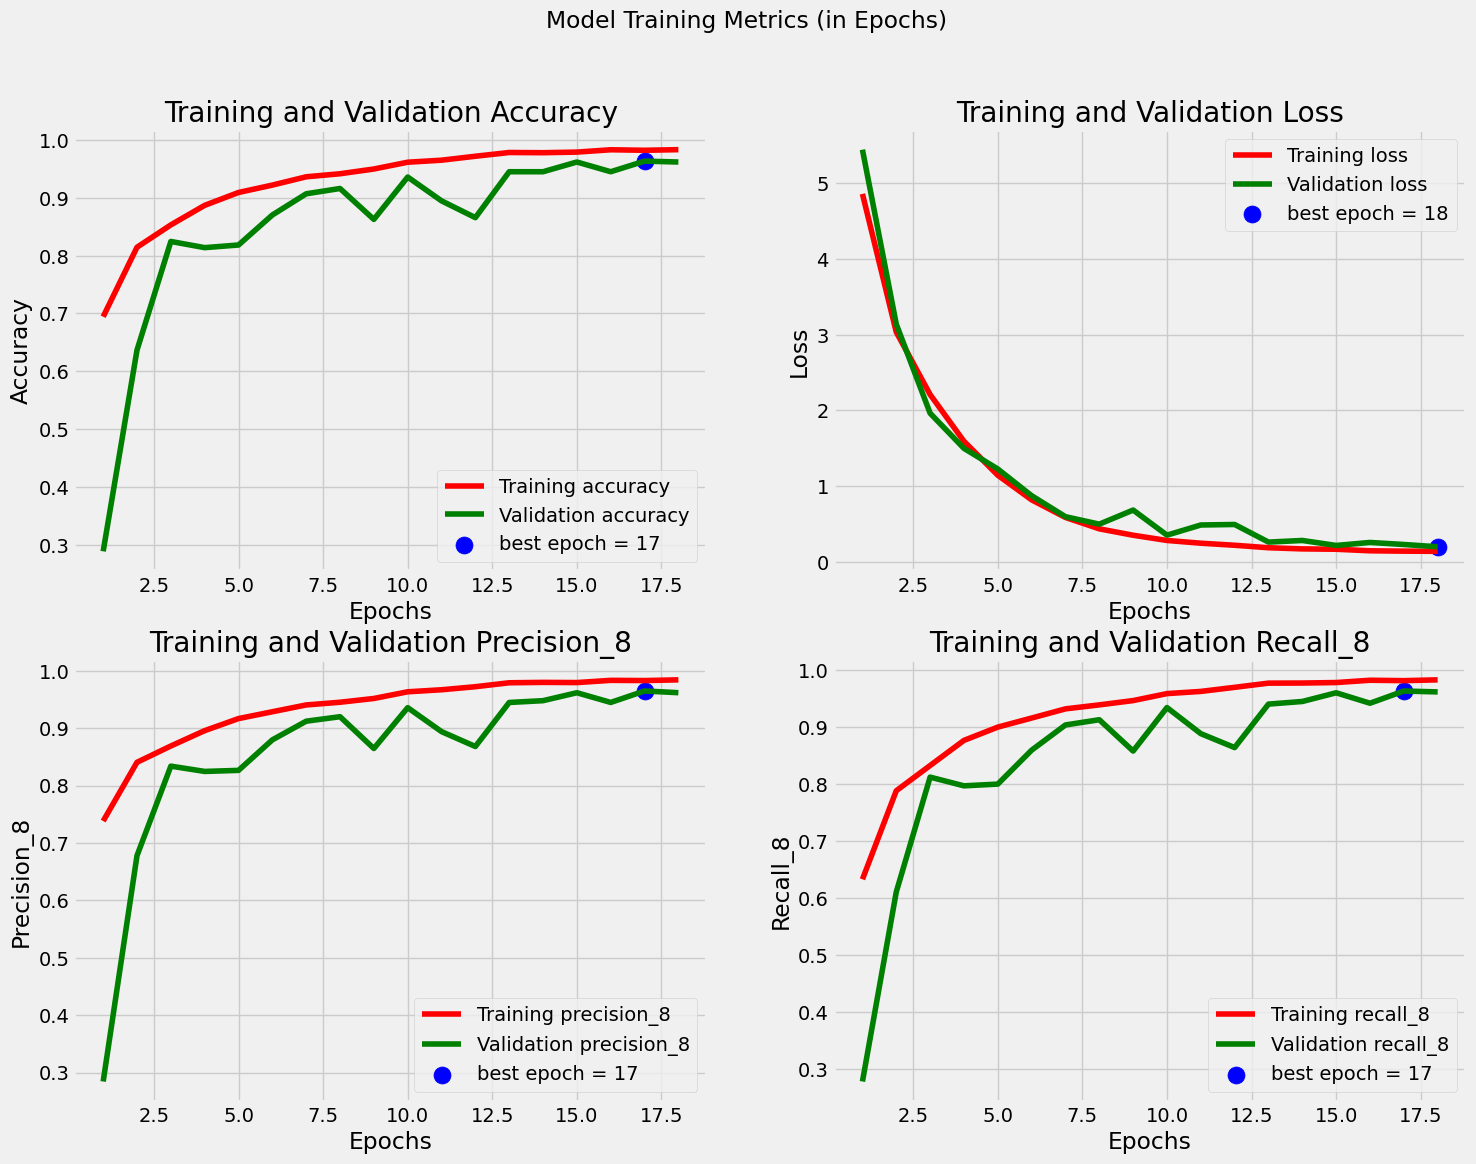

In [72]:
# Getting the training and validation history of our CNN model
# metrics = ['accuracy', 'loss', 'precision_8', 'recall_8']

metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
train_metrics = {m: cm_hist.history[m] for m in metrics}
validation_metrics = {m: cm_hist.history[f'val_{m}'] for m in metrics}

# Finding the best epochs and values achieved
best_epochs = {}
best_values = {}

for metric in metrics:
    if metric == 'loss':
        # find the lowest validation loss and store it's index
        idx = np.argmin(validation_metrics[metric])
    else:
        idx = np.argmax(validation_metrics[metric])

    best_epochs[metric] = idx + 1
    best_values[metric] = validation_metrics[metric][idx]


# Plot results
plt.figure(figsize=(16,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(train_metrics[metric]) + 1)

    plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric],
                s=150, c='blue', label=f'best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics (in Epochs)')
plt.show()


In [63]:
# Evaluate model performance on dataset splits - train, test and validation

train_score = custom_model.evaluate(train_gen, verbose=1)
validation_score = custom_model.evaluate(validation_gen, verbose=1)
test_score = custom_model.evaluate(testing_gen, verbose=1)

print(f"Training Accuracy: {train_score[1] * 100:.2f}%")
print(f"Training Loss: {train_score[0]:.4f}")

print(f"\n\nValidation Accuracy: {validation_score[1] * 100:.2f}%")
print(f"Validation Loss: {validation_score[0]:.4f}")

print(f"\n\nTesting Accuracy: {test_score[1] * 100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")


357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.9947 - loss: 0.1112 - precision_8: 0.9948 - recall_8: 0.9947
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9546 - loss: 0.2495 - precision_8: 0.9546 - recall_8: 0.9546
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9844 - loss: 0.1798 - precision_8: 0.9844 - recall_8: 0.9844 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9719 - loss: 0.1944 - precision_8: 0.9727 - recall_8: 0.9714
Training Accuracy: 99.53%
Training Loss: 0.1108


Validation Accuracy: 96.34%
Validation Loss: 0.2001


Testing Accuracy: 96.49%
Testing Loss: 0.2071


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


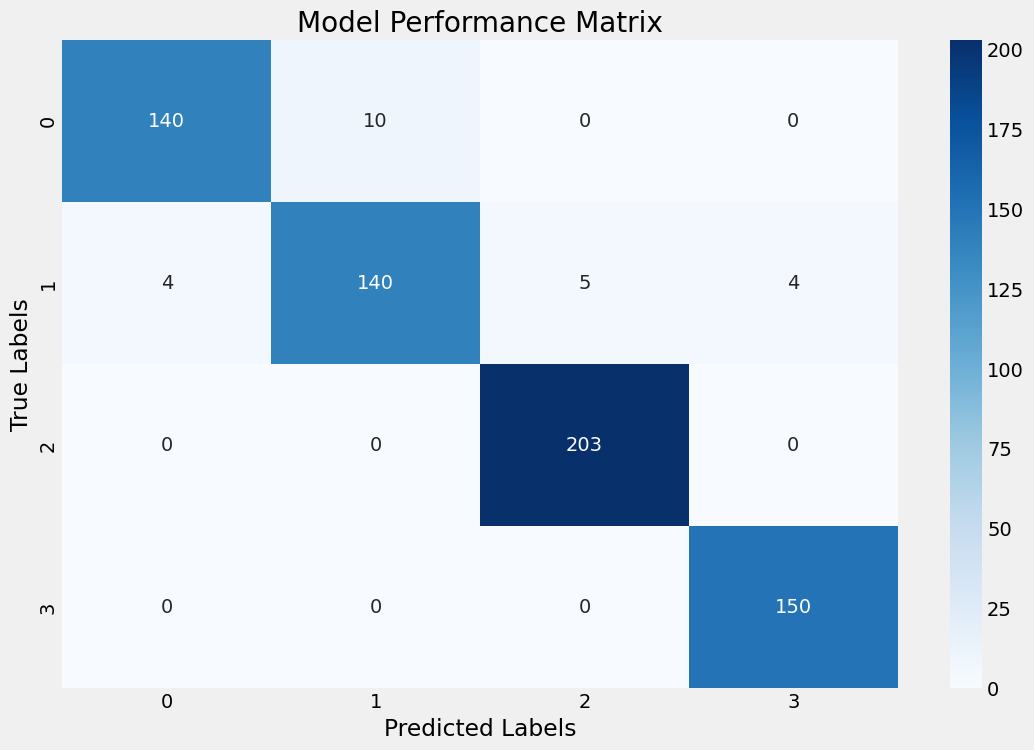

In [64]:
# Create a confusion matrix to investigate the scenarios where the model
# performs best and identify areas of improvement.

preds = custom_model.predict(testing_gen)
# choose the highest probability class
y_pred = np.argmax(preds, axis=1)

# Map the classes to numerical categories, as the model understands numerical
# class labels.

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Create and display the confusion matrix.

conf_matrix = confusion_matrix(testing_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Model Performance Matrix')
plt.show()


In [67]:
# Define a function to visualize custom model predictions on some example images

from PIL import Image

def predict(image_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6,8))

    # Load and preprocess input image

    image = Image.open(image_path)
    resized_image = image.resize((224,224))

    image_array = np.asarray(resized_image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0

    # Retrieve model predictions
    predictions = custom_model.predict(image_array)
    probabilities = list(predictions[0])

    # Retrieve predicted classes
    predicted_class_index = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_index]

    # Plot input image
    plt.subplot(2,1,1)
    plt.imshow(resized_image)
    plt.title(f'Input MRI image \nPredicted class: {predicted_class}')

    # Plot prediction proabilities achieved
    plt.subplot(2,1,2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probabilites", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"Predicted tumor type: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


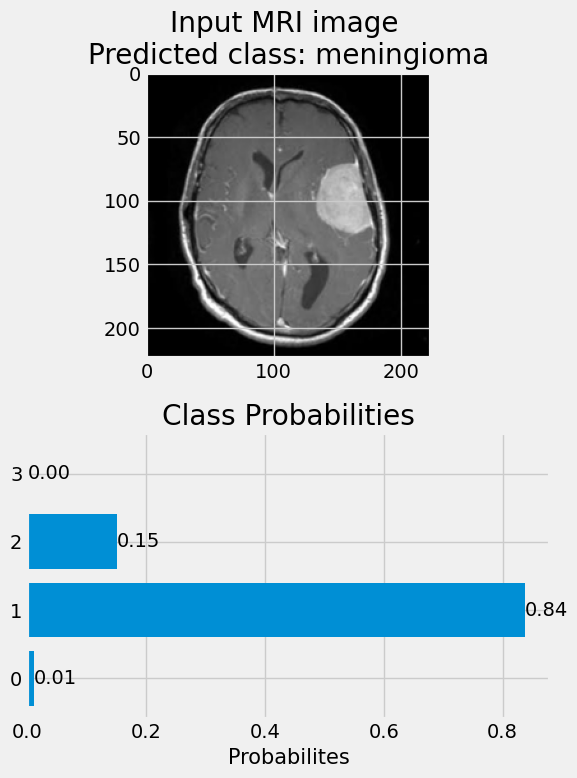

Predicted tumor type: meningioma


In [71]:
# Testing
predict("/content/image.jpg")

In [69]:
# Save model weights for future utilization.
custom_model.save_weights('custom_cnn_model.weights.h5')